# **(1) Data Overview**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

No missing and duplicated values

In [7]:
num_cols = df.select_dtypes(include=[int,float]).columns
cat_cols = df.select_dtypes(include=[object]).columns

In [8]:
for columns in cat_cols:
    print(f'value counts for {columns}:\n',df[columns].value_counts())
    print('-'*50)

value counts for job:
 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
--------------------------------------------------
value counts for marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
--------------------------------------------------
value counts for education:
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
--------------------------------------------------
value counts for default:
 default
no     44396
yes      815
Name: count, dtype: int64
--------------------------------------------------
value counts for housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64
-------------------------------------------------

In [9]:
Columns_with_unknown = ['job' , 'education' , 'contact' , 'poutcome']

In [10]:
for columns in Columns_with_unknown:
    print(df[columns].mode())

0    blue-collar
Name: job, dtype: object
0    secondary
Name: education, dtype: object
0    cellular
Name: contact, dtype: object
0    unknown
Name: poutcome, dtype: object


Problem with 'poutcome' column , we have to deal with it separately

In [11]:
for columns in Columns_with_unknown:
    df[columns] = df[columns].str.replace('unknown' , str(df[columns].mode()[0]))

In [12]:
for columns in cat_cols:
    print(f'value counts for {columns}:\n',df[columns].value_counts())
    print('-'*50)

value counts for job:
 job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
--------------------------------------------------
value counts for marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
--------------------------------------------------
value counts for education:
 education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
--------------------------------------------------
value counts for default:
 default
no     44396
yes      815
Name: count, dtype: int64
--------------------------------------------------
value counts for housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64
--------------------------------------------------
value counts for loan:
 loan

In [13]:
df[(df['poutcome'].isin(['unknown'])) & (df['pdays'].isin([-1]))]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In this step firstly, I have replaced all the unknown values with the most_frequent values of each categorical column.  
Seceondly, unknown values from poutcome column is legit because those individuals were not contacted in the previous campaign.

In [14]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [15]:
df['age'].value_counts() # No problem 

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [16]:
df['balance'].value_counts() # No problem

balance
0        3514
1         195
2         156
4         139
3         134
         ... 
14204       1
8205        1
9710        1
7038        1
4416        1
Name: count, Length: 7168, dtype: int64

In [17]:
df['day'].value_counts() # No problem

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

In [18]:
df['duration'].value_counts() # No problem

duration
124     188
90      184
89      177
104     175
114     175
       ... 
1286      1
1380      1
1723      1
2184      1
1233      1
Name: count, Length: 1573, dtype: int64

In [19]:
df['campaign'].value_counts() # No problem

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
38        3
43        3
41        2
50        2
37        2
55        1
51        1
63        1
46        1
58        1
39        1
44        1
Name: count, dtype: int64

In [20]:
df['pdays'].value_counts() # No problem

pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 769        1
 587        1
 778        1
 854        1
Name: count, Length: 559, dtype: int64

In [21]:
df['previous'].value_counts() # No problem

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

# **(2) EDA-1 and Feature Engineering**

## Univariate Analysis

In [22]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Original skewness: 0.6848179257252598
Original kurtosis: 0.3195703759105042
log skewness: 0.11275728003943211
log kurtosis: -0.5267308702950939


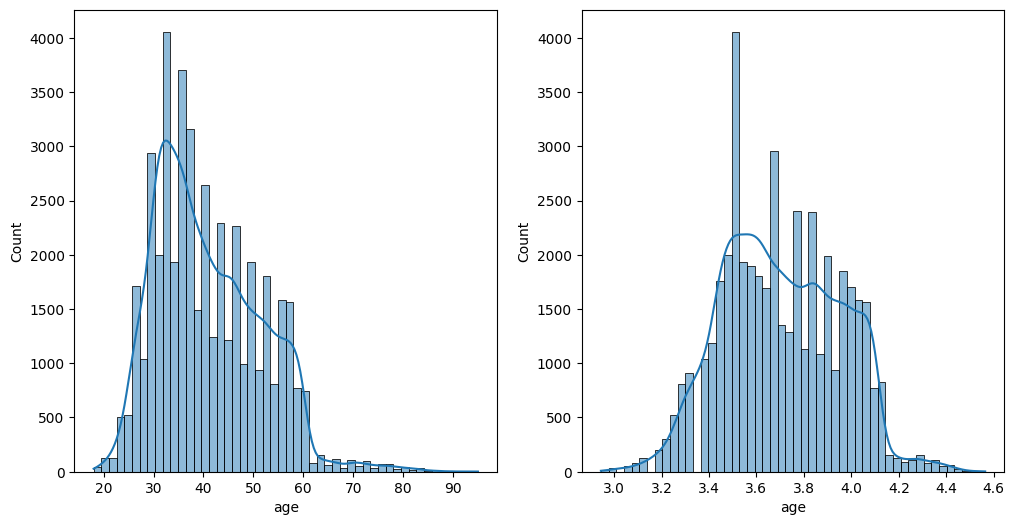

In [23]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

sns.histplot(df['age'],kde=True,bins=50,ax=ax[0])
print(f'Original skewness: {df["age"].skew()}')
print(f'Original kurtosis: {df["age"].kurt()}')

sns.histplot(np.log1p(df['age']),kde=True,bins=50,ax=ax[1])
print(f'log skewness: {np.log1p(df["age"]).skew()}')
print(f'log kurtosis: {np.log1p(df["age"]).kurt()}')

In [24]:
px.box(x= df['age'])

In [25]:
px.box(x= np.log1p(df['age']))

In [26]:
df['age_bin'] = pd.cut(df['age'],bins=[17,30,40,55,65,100],labels=['18-30','31-40','41-55','56-65','65+'])

In [27]:
px.pie(data_frame=df['age_bin'].value_counts(),names=df['age_bin'].value_counts().index,values=df['age_bin'].value_counts())

40% of the people belong to the 31-40 age range   
35% of the people belong to the 41-55 age range   
Participation of senior citizens are very low (1.66%)  

For Age Column,  
log transform doesn't add much value , the outliers are actual people so we can't remove them . Instead we have created a new age_bin column

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student')])

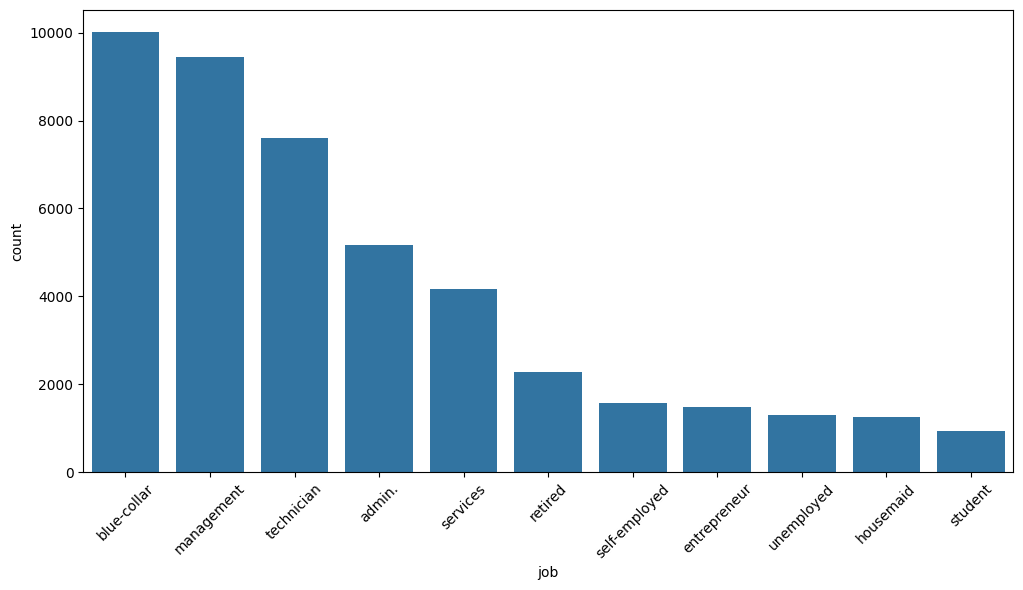

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['job'].value_counts().index,y=df['job'].value_counts())
plt.xticks(rotation=45)

The top 3 jobs are blue-collar , management , technician 

In [29]:
px.pie(data_frame=df['job'].value_counts(),names=df['job'].value_counts().index,values=df['job'].value_counts())

Almost 80% data covers these profession ['blue-collar','managment','technician','admin','services']

In [30]:
df['top_jobs'] = df['job'].isin(['blue-collar','managment','technician','admin','services']).astype(int)

In [31]:
df['top_jobs'].value_counts()

top_jobs
0    23440
1    21771
Name: count, dtype: int64

In [32]:
px.pie(data_frame=df['marital'].value_counts(),names=df['marital'].value_counts().index,values=df['marital'].value_counts())

60% of the people are married

In [33]:
px.pie(data_frame=df['education'].value_counts(),names=df['education'].value_counts().index,values=df['education'].value_counts())

56% of the people had Secondary level education   
30% of the people had tertiary level education

In [34]:
px.pie(data_frame=df['default'].value_counts(),names=df['default'].value_counts().index,values=df['default'].value_counts())

There is a very low credit default rate at 1.8% 

In [35]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

The average yearly balance is very low compare to standard deviation   
There are negative values here , so most likely log transformation will fail

In [36]:
px.box(x= df['balance'])

In [37]:
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

Lower bound: -1962.0
Upper bound: 3462.0


Applying the Yeo-Johnson power transformer here

In [38]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson',standardize=False)

df['balance_pt'] = pt.fit_transform(df[['balance']])

Original skewness: 8.360308326166326
Original kurtosis: 140.75154662504158
pt skewness: 1.0985820972305567
pt kurtosis: 86.67780432058156


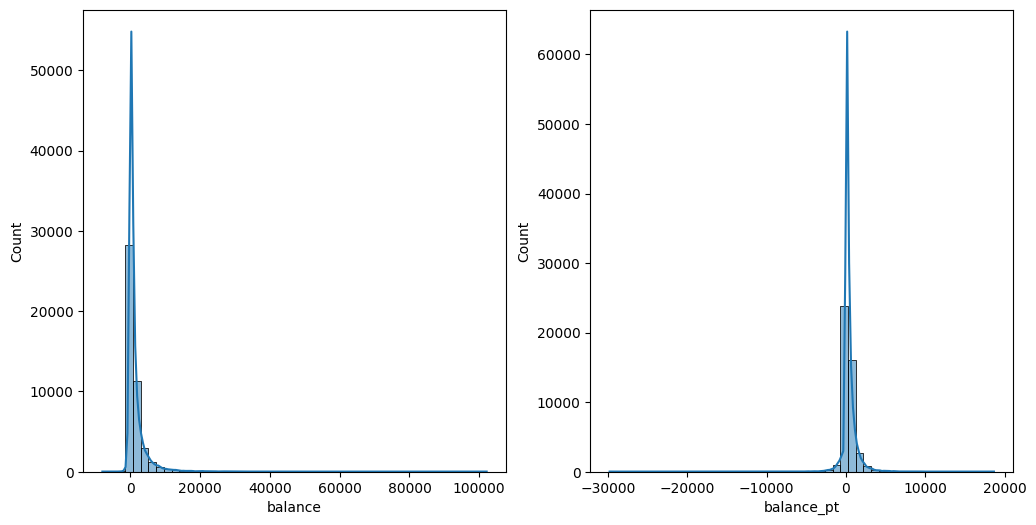

In [39]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

sns.histplot(df['balance'],kde=True,bins=50,ax=ax[0])
print(f'Original skewness: {df["balance"].skew()}')
print(f'Original kurtosis: {df["balance"].kurt()}')

sns.histplot(df['balance_pt'],kde=True,bins=50,ax=ax[1])
print(f'pt skewness: {df["balance_pt"].skew()}')
print(f'pt kurtosis: {df["balance_pt"].kurt()}')

In [40]:
px.box(x= df['balance_pt'])

Even after applying the Transformation , The number of outliers doesn't change that much , but the distribution has turned into a normal distribution  

In [41]:
(df[df['balance'] > 5000].shape[0] / df.shape[0])*100

6.29271637433368

balances over 5000 are 6.3% of the total data.

In [42]:
def balance_bins(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'zero'
    elif x < 500:
        return 'low positive'
    elif x < 1000:
        return 'medium positive'
    elif x < 5000:
        return 'high positive'
    else:
        return 'extreme positive'


In [43]:
df['balance_bins'] = df['balance'].copy()
df['balance_bins'] = df['balance_bins'].apply(balance_bins)

In [44]:
df['balance_bins'].value_counts()

balance_bins
low positive        16357
high positive       11795
medium positive      6932
negative             3766
zero                 3514
extreme positive     2847
Name: count, dtype: int64

In [45]:
px.pie(data_frame=df['balance_bins'].value_counts(),names=df['balance_bins'].value_counts().index,values=df['balance_bins'].value_counts())

36% of individual belongs to yearly average balance range "1-500"  
26% of the individual belongs to the yearly balance range "1000-5000"

In [46]:
zero_balance = df[df['balance_bins'].isin(['zero'])]['job'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student')])

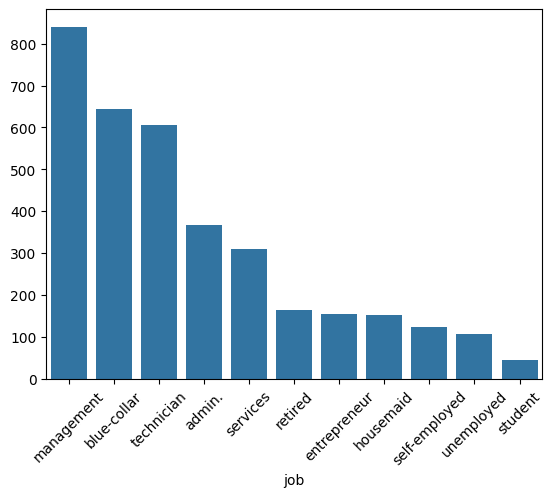

In [47]:
sns.barplot(x=zero_balance.index,y=zero_balance.values)
plt.xticks(rotation=45)

The most jobs with zero yearly average balances are , management , blue-collar, technician

<Axes: ylabel='count'>

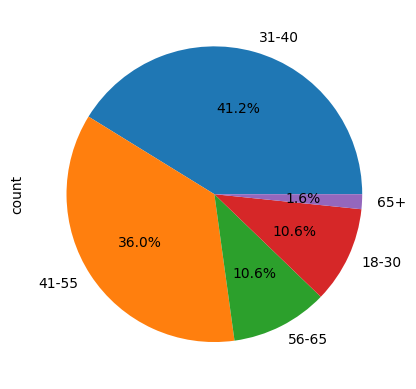

In [48]:
df[df['balance_bins'].isin(['zero'])]['age_bin'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

77% of the individual with zero yearly balances are between 31-55 age group

In [49]:
px.pie(data_frame=df['housing'].value_counts(),names=df['housing'].value_counts().index,values=df['housing'].value_counts())

55% people have housing loan 

In [50]:
px.pie(data_frame=df['loan'].value_counts(),names=df['loan'].value_counts().index,values=df['loan'].value_counts())

84% of the people has personal loan

In [51]:
df['has_loan'] = ((df['housing']=='yes') | (df['loan']=='yes'))

In [52]:
df['has_loan'] = df['has_loan'].astype(int)

In [53]:
px.pie(data_frame=df['has_loan'].value_counts(),names=df['has_loan'].value_counts().index,values=df['has_loan'].value_counts())

61% individuals has any kinds of loan

In [54]:
df['loan_default_risk'] = ((df['has_loan']==1) | (df['default']=='yes')).astype(int)

In [55]:
px.pie(data_frame=df['loan_default_risk'].value_counts(),names=df['loan_default_risk'].value_counts().index,values=df['loan_default_risk'].value_counts())

62.4% Individuals has any kinds of loan or credit default 

In [56]:
px.pie(data_frame=df['contact'].value_counts(),names=df['contact'].value_counts().index,values=df['contact'].value_counts())

93.6% people has been contacted with cellular phone

<Axes: xlabel='day'>

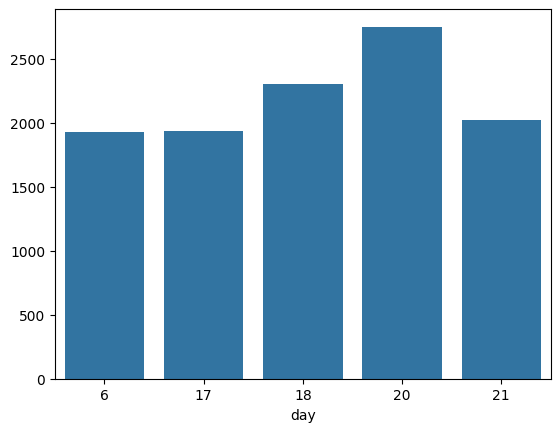

In [57]:
sns.barplot(x=df['day'].value_counts().head(5).index,y=df['day'].value_counts().head(5).values)

Most calls were made in the 3rd week of the month

<Axes: xlabel='month'>

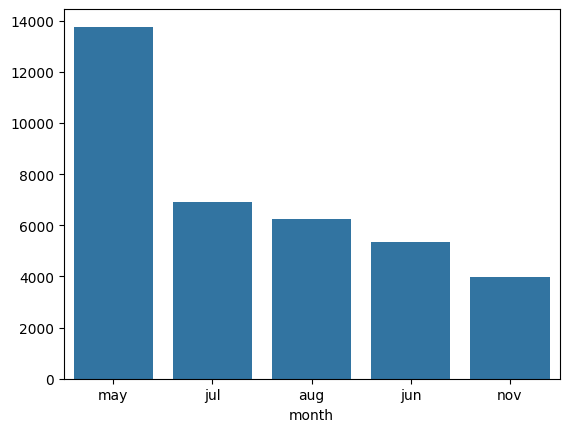

In [58]:
sns.barplot(x=df['month'].value_counts().head(5).index,y=df['month'].value_counts().head(5).values)

Most of the call were made in the middle of the year , Highest in May 

In [59]:
df = df[df['duration'] != 0]
df = df[~(df['duration'] < 15)]

In [60]:
df['duration'].describe()

count    44444.000000
mean       262.449262
std        257.647166
min         15.000000
25%        107.000000
50%        183.000000
75%        323.000000
max       4918.000000
Name: duration, dtype: float64

Skewness: 3.159693973844359
Kurtosis: 18.252340052302333
Skewness: -0.089047485913917
Kurtosis: 0.11650398643883308


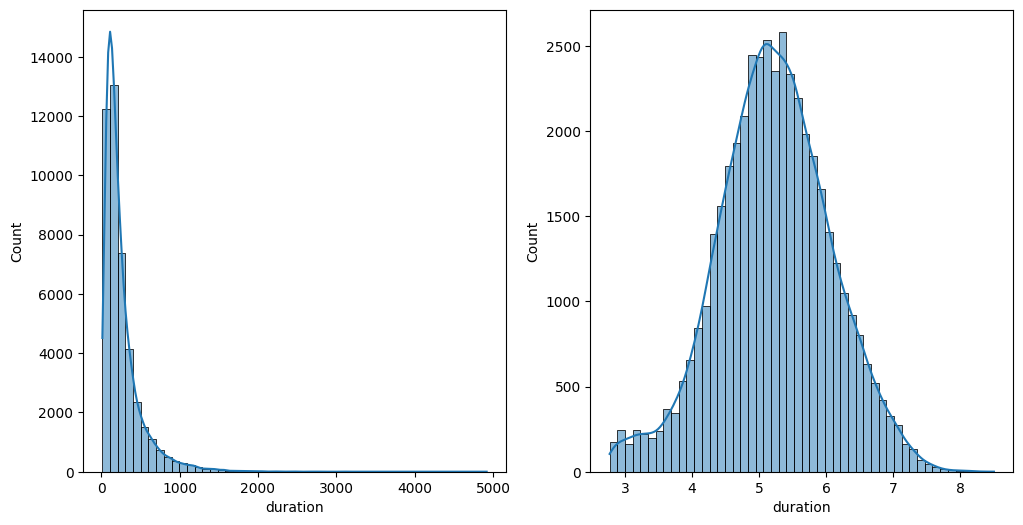

In [61]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.histplot(df['duration'],kde=True,bins=50,ax=ax[0])
print(f'Skewness: {df["duration"].skew()}')
print(f'Kurtosis: {df["duration"].kurt()}')

sns.histplot(np.log1p(df['duration']),kde=True,bins=50,ax=ax[1])
print(f'Skewness: {np.log1p(df["duration"]).skew()}')
print(f'Kurtosis: {np.log1p(df["duration"]).kurt()}')

In [62]:
px.box(x=df['duration'])

In [63]:
px.box(x=np.log1p(df['duration']))

For duration column,
after applying log transform even though it has become a left skwewed , the outlier range has become low
so we can apply transformation here 

In [64]:
df[df['duration'] > 540].shape

(4646, 23)

In [65]:
def duration_m(x):
    if x <60:
        return 'less than 1 minute'
    elif x <120:
        return 'less than 2 minutes'
    elif x <180:
        return 'less than 3 minutes'
    elif x <240:
        return 'less than 4 minutes'
    elif x <300:
        return 'less than 5 minutes'
    elif x <360:
        return 'less than 6 minutes'
    elif x <420:
        return 'more than 7 minutes'
    elif x <480:
        return 'more than 8 minutes'
    elif x <540:
        return 'more than 9 minutes'
    else:
        return 'more than 10 minutes'

In [66]:
df['duration_min'] = df['duration'].copy()
df['duration_min'] = df['duration_min'].apply(duration_m)

<Axes: xlabel='duration_min'>

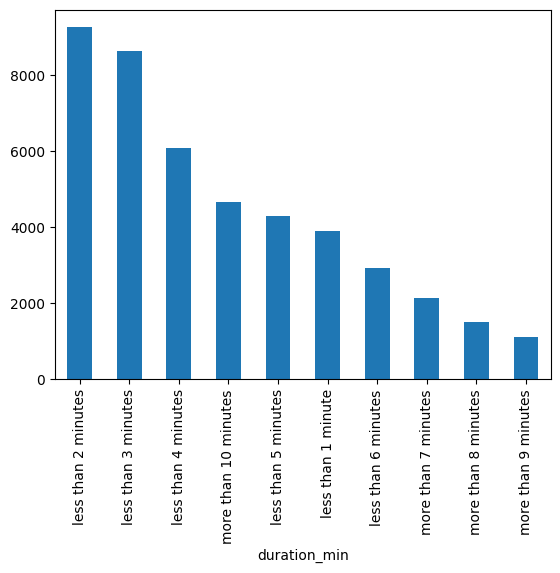

In [67]:
df['duration_min'].value_counts().plot(kind='bar')

Most of the call durations were less than 2 and 3 mintues

In [68]:
df['is_long_cal'] = (df['duration'] > 300).astype('int64')

In [69]:
px.pie(data_frame=df['is_long_cal'].value_counts(),names=df['is_long_cal'].value_counts().index,values=df['is_long_cal'].value_counts())

27% of the calls were long calls(more than 5 minutes),must be very intensive huh!

In [70]:
df['campaign'].describe()

count    44444.000000
mean         2.694132
std          2.951803
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

<Axes: xlabel='campaign', ylabel='Count'>

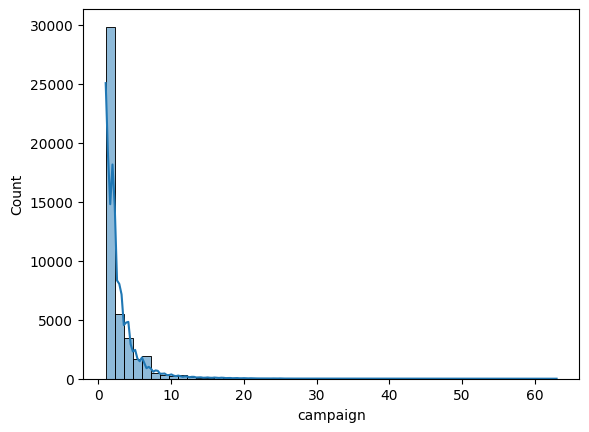

In [71]:
sns.histplot(df['campaign'],kde=True,bins=50)

In [72]:
px.box(x=df['campaign'])

In [73]:
def cam_call(x):
    if x == 1:
        return '1 call'
    elif x == 2:
        return '2 calls'
    elif x>2 and x<=6:
        return ' 3-6 calls'
    else:
        return 'more than 6 calls'

In [74]:
df['campaign_call'] = df['campaign'].copy()
df['campaign_call'] = df['campaign_call'].apply(cam_call)


<Axes: xlabel='campaign_call'>

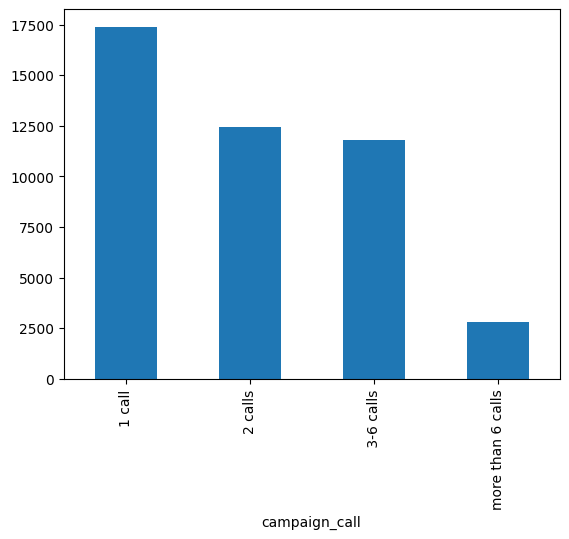

In [75]:
df['campaign_call'].value_counts().plot(kind='bar')

In [76]:
px.pie(data_frame=df['campaign_call'].value_counts(),names=df['campaign_call'].value_counts().index,values=df['campaign_call'].value_counts())

Almost 60% of the individuals recieves 1 & 2 calls   
6.78% individuals got more than 6 calls which might be annoying!

In [77]:
df['multiple_calls'] = (df['campaign'] > 1).astype('int64')

In [78]:
px.pie(data_frame=df['multiple_calls'].value_counts(),names=df['multiple_calls'].value_counts().index,values=df['multiple_calls'].value_counts())

60% calls were multiple calls

In [79]:
df['pdays'].value_counts()

pdays
-1      36332
 182      167
 92       147
 183      126
 91       125
        ...  
 409        1
 444        1
 680        1
 550        1
 530        1
Name: count, Length: 546, dtype: int64

In [80]:
df['contacted_before'] = ~df['pdays'].isin([-1])

<Axes: ylabel='count'>

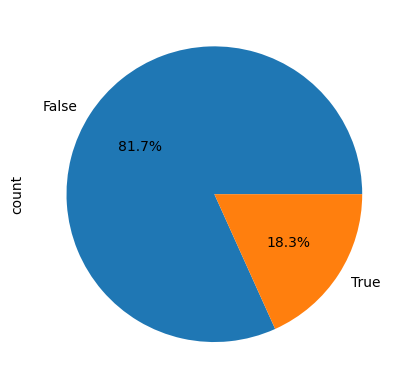

In [81]:
df['contacted_before'].value_counts().plot(kind='pie',autopct='%1.1f%%')

80% of the Individuals were never contacted before

In [82]:
pday_yes = df[df['pdays'] != -1]['pdays']

In [83]:
px.box(x=pday_yes)

In [84]:
def pdays_cat(x):
    if x == -1:
        return 'never contacted'
    elif x>0 and x<180:
        return 'less than 6 months'
    elif x<365:
        return 'less than 1 year'
    else:
        return 'more than 1 year'

In [85]:
df['pdays_cat'] = df['pdays'].copy()
df['pdays_cat'] = df['pdays_cat'].apply(pdays_cat)

<Axes: ylabel='count'>

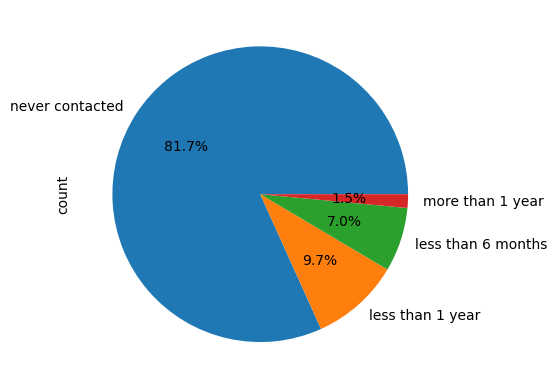

In [86]:
df['pdays_cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

80% of the individuals were never comtacted before

In [87]:
def prev_cam_call(x):
    if x == 0:
        return 'never contacted'
    elif x == 1:
        return '1 calls'
    elif x == 2:
        return '2 calls'
    elif x>2 and x<=6:
        return ' 3-6 calls'
    else:
        return 'more than 6 calls'

In [88]:
df['previous_camp_call'] = df['previous'].copy()
df['previous_camp_call'] = df['previous_camp_call'].apply(prev_cam_call)

In [89]:
px.pie(data_frame=df['previous_camp_call'].value_counts(),names=df['previous_camp_call'].value_counts().index,values=df['previous_camp_call'].value_counts())

In [90]:
df.loc[df['poutcome'] == 'unknown','poutcome'] = 'never contacted'

In [91]:
px.pie(data_frame=df['poutcome'].value_counts(),names=df['poutcome'].value_counts().index,values=df['poutcome'].value_counts())

In [92]:
prev_contac_succes = df[df['poutcome'] != 'never contacted']

In [93]:
px.pie(data_frame=prev_contac_succes['poutcome'].value_counts(),names=prev_contac_succes['poutcome'].value_counts().index,values=prev_contac_succes['poutcome'].value_counts())

Among those who were contacted previously in any campaign , the succes rate was 18.3% 

In [94]:
px.pie(data_frame=df['y'].value_counts(),names=df['y'].value_counts().index,values=df['y'].value_counts())

Among 45000 individuals,The success rate was only 11.7%  
Imbalanced Dataset , we might have to apply some transformation to that 

## Bi and Multivariate Analysis

<Axes: xlabel='y', ylabel='age'>

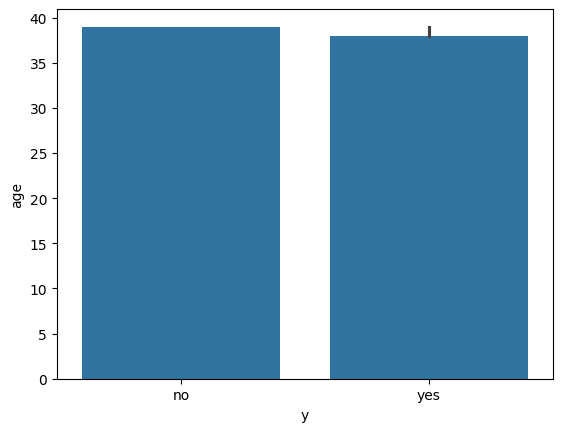

In [95]:
sns.barplot(x=df['y'],y=df['age'],estimator=np.median)

The median age for success and failure is similar at 37-38 years

In [96]:
px.imshow(pd.crosstab(index=df['y'],columns=df['job']))

The highest number of people who did not subscribe are blue-collar job holders

In [97]:
px.imshow(pd.pivot_table(df,index='y',columns='job',values='balance',aggfunc=np.mean),text_auto=True)

Highest Average yearly balance is 2690 those who are retired and subscribed to bank deposit

In [98]:
px.imshow(pd.pivot_table(df,index='y',columns='job',values='age',aggfunc=np.mean),text_auto=True)

Highest average age is 67 those who are retired and subscribed to bank deposit

In [99]:
px.imshow(pd.crosstab(index=df['y'],columns=df['marital']))

The highest number of people who did not subscribe are married

In [100]:
px.imshow(pd.pivot_table(df,index='y',columns='marital',values='balance',aggfunc=np.mean),text_auto=True)

The highest average yearly balance is 1915 for who are married and subscribed

In [101]:
px.imshow(pd.crosstab(index=df['y'],columns=df['education']))

The highest number of people who did not subscribe has Secondary education

In [102]:
px.imshow(pd.pivot_table(df,index='y',columns='education',values='balance',aggfunc=np.mean),text_auto=True)

The highest yearly average balance is 2109 for people who has subscribed and have received tertiary education 

In [103]:
px.imshow(pd.crosstab(index=df['y'],columns=df['default']))

The highest number of people who has credit default has not subscribed

<Axes: xlabel='y', ylabel='balance'>

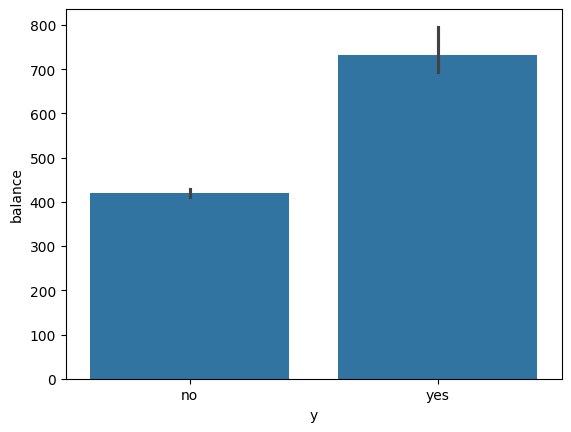

In [104]:
sns.barplot(x=df['y'],y=df['balance'],estimator=np.median)

Those who have subscribed their median yearly average balance is higher(700) than those have not (400) 

In [105]:
df['housing'].value_counts()

housing
yes    24699
no     19745
Name: count, dtype: int64

In [106]:
px.imshow(pd.crosstab(index=df['y'],columns=df['housing']))

The highest number of people who has taken housing loan also has not subscribed

In [107]:
px.imshow(pd.crosstab(index=df['y'],columns=df['loan']))

The highest number of people who has not subscribe did not also took personal loan

In [108]:
px.imshow(pd.crosstab(index=df['y'],columns=df['contact']))

The highest number of people who has not subscribed , the conversation was on cellular phone 

In [109]:
px.imshow(pd.crosstab(index=df['y'],columns=df['day']))

The highest number of contact was made on 3rd week of the month and most of them did not subscribe 

In [110]:
px.imshow(pd.crosstab(index=df['y'],columns=df['month']))

The highest number of calls were made in the months of may , june ,july and august . And most of the customers did not subscribe

In [111]:
df['is_q2_calls'] = (df['month'].isin(['may','jun','jul','aug'])).astype('int64')

In [112]:
px.pie(data_frame=df['is_q2_calls'].value_counts(),names=df['is_q2_calls'].value_counts().index,values=df['is_q2_calls'].value_counts())

71% of calls were made in ['may','jun','jul','aug']

In [113]:
px.imshow(pd.crosstab(index=df['y'],columns=df['age_bin']))

The highest number of people were from 31-55 age range and they did not subscribe 

In [114]:
px.imshow(pd.crosstab(index=df['y'],columns=df['balance_bins']))

highest number of people has low positive and high positive yearly average balance and they did not subscribe 

<Axes: xlabel='y', ylabel='duration'>

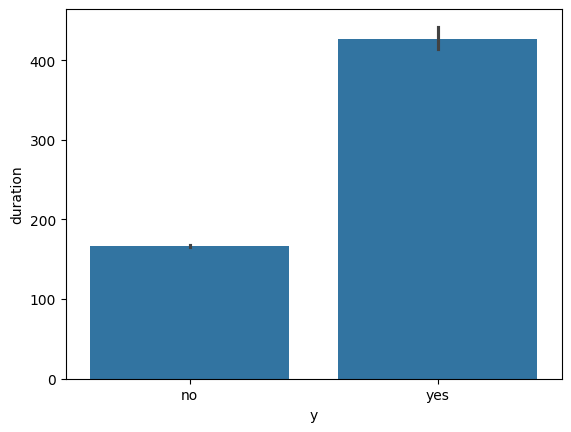

In [115]:
sns.barplot(x=df['y'],y=df['duration'],estimator=np.median)

The median duration of calls for those who subscribed is 410-420 secs  
The median duration of calls for those who did not subscribed is 170-180 secs

In [116]:
px.imshow(pd.crosstab(index=df['y'],columns=df['duration_min']))

People did not subscribe with whom the call duration was less than 2/3 mintues,and it was the highest count 

In [117]:
px.imshow(pd.crosstab(index=df['y'],columns=df['is_long_cal']))

The subscription is inversely related with the duration of calls

<Axes: xlabel='y', ylabel='campaign'>

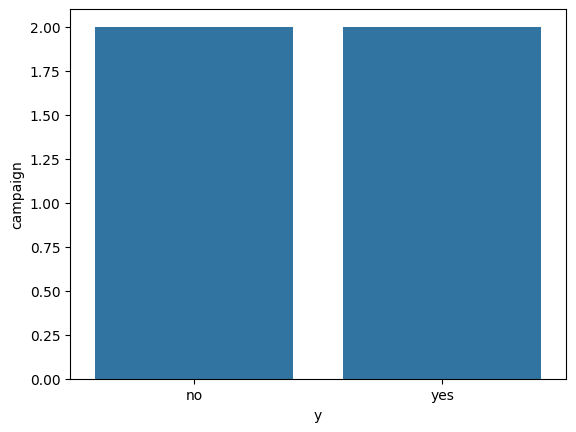

In [118]:
sns.barplot(x=df['y'],y=df['campaign'],estimator=np.median)

The median number of campaign call is same (2) for both who subscribed and did not 

In [119]:
px.imshow(pd.crosstab(index=df['y'],columns=df['pdays_cat']))

In [120]:
px.imshow(pd.crosstab(index=df['y'],columns=df['multiple_calls']))

Most of the people received a multiple call and they did not subscribe 

In [121]:
px.imshow(pd.crosstab(index=df['y'],columns=df['contacted_before']))

With most of the current individual , there was no contact before . And they did not subscribe this time either

In [122]:
px.imshow(pd.crosstab(index=df['y'],columns=df['poutcome']))

In [123]:
A1 = df[(df['contacted_before'] == 1) & (df['poutcome'] == 'success')]['y']

In [124]:
px.pie(data_frame=A1.value_counts(),names=A1.value_counts().index,values=A1.value_counts())

65% of the people who subscribed in the previous campaign also subscribed in this current campaing

<Axes: ylabel='count'>

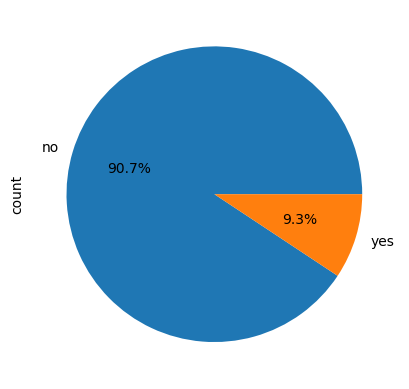

In [125]:
df[(df['contacted_before'] == 0)]['y'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

9.2% of the people who were never contacted before have subscribed to bank deposit 

In [126]:
A2 = df[(df['multiple_calls'] == 0) & (df['is_long_cal'] == 0)]['y']

In [127]:
px.pie(data_frame=A2.value_counts(),names=A2.value_counts().index,values=A2.value_counts())

Only 8% of the people subscribed who did not receive multiple calls and the call duration was less than 5 mintues 

In [128]:
def week(x):
    if x < 8:
        return 'week 1'
    elif x < 15:
        return 'week 2'
    elif x < 22:
        return 'week 3'   
    else:
        return 'week 4'

In [129]:
df['week'] = df['day'].copy()
df['week'] = df['week'].apply(week)

In [130]:
px.imshow(pd.crosstab(index=df['y'],columns=df['week']))

Highest calls were made in the 3rd week and people did not subscribe

<Axes: ylabel='count'>

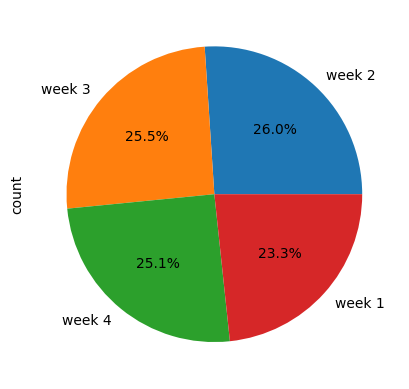

In [131]:
df[df['y'] == 'yes']['week'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

The subscription of people were evenly distributed among the 4 weeks of the month

In [132]:
df['month'].value_counts()

month
may    13537
jul     6816
aug     6168
jun     5192
nov     3914
apr     2893
feb     2573
jan     1400
oct      716
sep      548
mar      476
dec      211
Name: count, dtype: int64

In [133]:
def qtr(month):
    if month in ['jan','feb','mar']:
        return 'Q1'
    elif month in ['apr','may','jun']:
        return 'Q2'
    elif month in ['jul','aug','sep']:
        return 'Q3'
    else:
        return 'Q4'

In [134]:
df['qtr'] = df['month'].copy()
df['qtr'] = df['qtr'].apply(qtr)

In [135]:
A3 = df[df['y'] == 'yes']['qtr'].value_counts()

In [136]:
px.pie(data_frame=A3,names=A3.index,values=A3)

Most calls that converted into subscription are in the 2nd Quarter ,it's 38%

In [137]:
px.pie(data_frame=df['qtr'].value_counts(),names=df['qtr'].value_counts().index,values=df['qtr'].value_counts())

Almost 50% of the calls were made in the 2nd Quarter

In [138]:
px.imshow(pd.crosstab(index=df['week'],columns=df['month']))

<Axes: ylabel='count'>

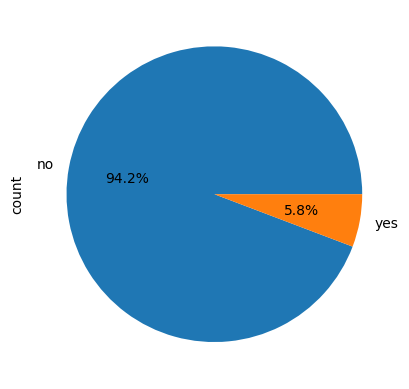

In [139]:
df[df['campaign_call'] == 'more than 6 calls']['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Only 5.3% of the people subscribed who received more than 6 calls

<Axes: ylabel='count'>

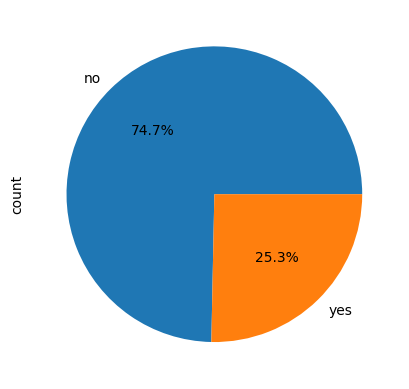

In [140]:
df[(df['campaign_call'] == 'more than 6 calls') & (df['is_long_cal'] == 1 )]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

25% of the people subscribed who received more than 6 calls and call lenth was more than 5 mintues

In [141]:
df['high_intensity_calls']  = ((df['campaign_call'] == 'more than 6 calls') & (df['is_long_cal'] == 1 )).astype('int64')

In [142]:
df['high_intensity_calls'].value_counts()

high_intensity_calls
0    43907
1      537
Name: count, dtype: int64

<Axes: ylabel='count'>

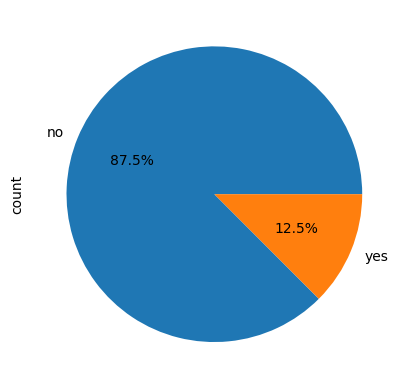

In [143]:
df[(df['housing'] == 'no') | (df['loan'] == 'no')]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Only 12.3% of people have subscribed who don't have any type of loan 

<Axes: ylabel='count'>

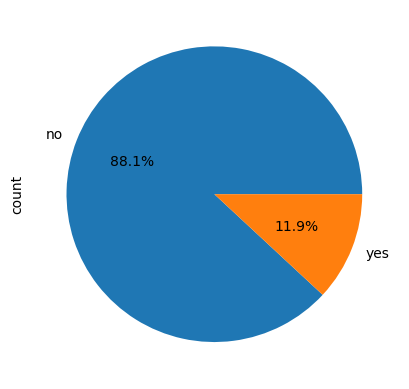

In [144]:
df[(df['housing'] == 'no') | (df['loan'] == 'no') | (df['default'] == 'no')]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

11.7% people have subscribed who doesn't have any type of loan or has credit default 

# **(3) EDA Summary**



### 🧑‍🤝‍🧑 **Demographics & Social Factors**
- **Age Distribution**:
  - Majority (75%) are between **31–55 years**.
  - **Senior citizens (1.66%)** have very low participation.
  - Median age for both success and failure is **37–38 years**.
- **Marital Status**:
  - **60% are married**.
  - Married individuals are **less likely to subscribe**.
- **Education**:
  - **56% have secondary education**, and **30% tertiary**.
  - People with **secondary education** are least likely to subscribe.
  - Tertiary-educated individuals who subscribed had the **highest average balance (2109)**.

---

### 💼 **Occupation & Financial Behavior**
- **Top Jobs**: Blue-collar, management, technician.
  - These jobs also have the **highest number of zero yearly balances**.
  - Blue-collar workers are **least likely to subscribe**.
- **Credit Default**:
  - Very low rate (**1.8%**).
  - Those with credit default **rarely subscribe**.
- **Loans**:
  - **55% have housing loans**, **84% have personal loans**, and **10% have both**.
  - Individuals with **any loan** are **less likely to subscribe**.
  - Only **12.3% without loans** subscribed.
  - Only **11.7% without loans or credit default** subscribed.

---

### 💰 **Yearly Balance Insights**
- **Distribution**:
  - Highly skewed with **negative values**, making log transformation ineffective.
  - After transformation, distribution becomes normal but **outliers remain**.
- **Balance Ranges**:
  - **36%** fall in **1–500** range.
  - **26%** fall in **1000–5000** range.
  - Only **6.3%** have balances over **5000**.
- **Subscription Correlation**:
  - Subscribed individuals have **higher median balance (700)** vs non-subscribers (400).
  - Retired individuals who subscribed had the **highest average balance (2690)** and **highest age (67)**.

---

### 📞 **Contact & Campaign Behavior**
- **Contact Method**:
  - **93.6% via cellular phone**.
  - Most calls made in **May**, **June**, **July** (Q2).
- **Call Timing**:
  - **3rd week of the month** had the highest call volume, but **lowest subscription**.
  - Subscription was **evenly distributed** across weeks.
- **Call Duration**:
  - Most calls were **<2–3 minutes**.
  - Subscribed: **410–420 secs**, Not subscribed: **170–180 secs**.
  - **Inverse relationship** between call duration and subscription.
- **Call Frequency**:
  - **60% received multiple calls**.
  - **6.78% received >6 calls**, mostly non-subscribers.
  - Only **5.3% of >6 call receivers subscribed**.
  - **25% subscribed** if they received >6 calls **and** call duration >5 mins.
- **Previous Contact**:
  - **80% never contacted before**, and most did not subscribe.
  - Among previously contacted, **18.3% success rate**.
  - **65% of previous subscribers subscribed again**.
  - **9.2% of never-contacted individuals subscribed**.

---

### 📊 **Campaign Outcome & Imbalance**
- **Overall Success Rate**: **11.7%** among 45,000 individuals.
- **Imbalanced Dataset**: Subscription is rare, requiring **balancing techniques**.
- **Key Non-Subscribers**:
  - Blue-collar workers.
  - Married individuals.
  - Secondary education holders.
  - Individuals with loans or credit default.
  - Those contacted in 3rd week or Q2 but with short calls.

---

### 🔗 **Interconnected Insights**
- **Demographics + Financials**: Older, retired individuals with higher balances are more likely to subscribe.
- **Occupation + Balance**: Jobs with zero balances correlate with low subscription rates.
- **Contact Strategy**: Longer calls and multiple contacts **increase subscription likelihood**, but only when combined.
- **Loan Status + Subscription**: Having any loan or credit default **negatively impacts** subscription.
- **Education + Subscription**: Higher education correlates with higher balance and subscription rate.
- **Timing + Outcome**: Despite high call volume in Q2 and 3rd week, **conversion is low**, suggesting **quality of interaction matters more than quantity**.



In [145]:
df.drop(['balance_pt', 'has_loan', 'default_risk','balance_to_duration','top_80%_jobs',],axis=1,inplace=True)

KeyError: "['default_risk', 'balance_to_duration', 'top_80%_jobs'] not found in axis"

In [ ]:
df.shape

(44444, 32)

In [146]:
df.to_csv('final_data.csv',index=False)